In [121]:
!pip install tensorflow
!pip install keras
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy import concatenate
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import Sequential
from math import sqrt;

## 1. Loading and analysing dataset

In [122]:
dataset1= pd.read_csv('/content/air pollution.csv')

In [123]:
dataset1.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [124]:
dataset1.shape

(43824, 13)

In [125]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [126]:
dataset1.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [127]:
dataset1.isnull().values.any()

True

In [128]:
dataset1.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,2067
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [129]:
dataset1.dropna(subset=['pm2.5'], inplace=True)


In [130]:
dataset1.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [131]:
dataset1.isnull().values.any()

False

In [132]:
df=dataset1
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [133]:
df.dtypes

,0
No,int64
year,int64
month,int64
day,int64
hour,int64
pm2.5,float64
DEWP,int64
TEMP,float64
PRES,float64
cbwd,object


##2. Feature Engineering
**2.1. Feature Selection**

There are 8 features important for the forecast: PM2.5, dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. Hence, dropping other features.

In [134]:
print(df.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')


In [135]:
df1=df
df1

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [136]:
df1 = df1.drop(['No', 'year', 'month', 'day', 'hour'], axis=1)


In [137]:
df1.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [138]:
print(df1.columns)

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')


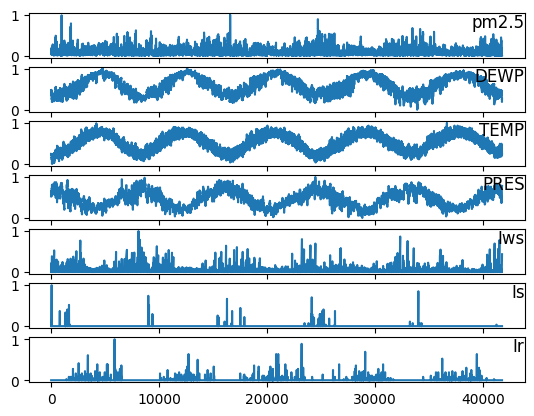

In [139]:
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plotting each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df1.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

**2.2. Label Encoding**

The Wind direction does not contain numerical values so label encoding is done.

In [140]:
 #integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

**2.3. Data Normalization**


In [141]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

## 3. Converting to Time Series Data
Since we use the LSTM neural network, we must sort the data according to the time. The dataset is transformed into a supervised learning problem. The weather variables for the hour to be predicted (t) are then removed. So, we have features for previous timestep (t-1) and for prediction of pollution PM2.5 taking its current timestep (t) data.

In [142]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [143]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002372   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003947   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005522   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008690   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.010265   

   var7(t-1)  var8(t-1)  var9(t-1)  var8(t)   var9(t)  
1   0.000000        0.0   0.148893      0.0  0.159960  
2   0.000000        0.0   0.159960      0.0  0.182093  
3   0.000000        0.0   0.182093      0.0  0.138833  
4   0.037037        0.0   0.138833      0.0  0.109658  
5   0.074074        0.0   0.109658      0.0  0.105634  


**Splitting into train and test sets**

In [144]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24*2
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :8], train[:, 8]
test_X, test_y = test[:, :8], test[:, 8]

**reshaping input to be 3D [samples, timesteps, features]**

In [145]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(17520, 1, 8) (17520,) (24235, 1, 8) (24235,)


## 4. Designing Network
We will define the LSTM with 100 neurons in the first hidden layer and a Dropout Layer of 0.3,Next there will be another hidden layer of 50 neurons and a Dropout of 0.2. Similarly, there will two more hidden layers with respective 0.2 Dropouts and 50 neurons. In Final Layer, 1 neuron in the output layer for predicting pollution. In the activation Function we used linear function, because of sequential dataset. In the batch size we used three days (24*3 Hours) data. Optimizer function we used Adam method. Loss function we used mean squared error. By monitoring the value of test data loss function, stop the training model when it is not decreasing, and save the current best model.

In [146]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.3))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [147]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 1, 100)              │          43,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 1, 50)               │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,251 (446.29 KB)

 Trainable params: 114,251 (446.29 KB)

 Non-trainable params: 0 (0.00 B)

## 5.Fitting the Network
Network is fit with epochs size of 50 , batch size of 72

In [148]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
244/244 - 54s - 221ms/step - loss: 0.0076 - val_loss: 0.0034
Epoch 2/50
244/244 - 8s - 34ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 3/50
244/244 - 7s - 31ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/50
244/244 - 3s - 13ms/step - loss: 0.0011 - val_loss: 7.0335e-04
Epoch 5/50
244/244 - 3s - 14ms/step - loss: 9.7299e-04 - val_loss: 5.9172e-04
Epoch 6/50
244/244 - 4s - 15ms/step - loss: 9.7697e-04 - val_loss: 6.0116e-04
Epoch 7/50
244/244 - 5s - 19ms/step - loss: 9.4031e-04 - val_loss: 6.0446e-04
Epoch 8/50
244/244 - 5s - 19ms/step - loss: 9.3513e-04 - val_loss: 5.8666e-04
Epoch 9/50
244/244 - 5s - 21ms/step - loss: 9.3709e-04 - val_loss: 5.7496e-04
Epoch 10/50
244/244 - 4s - 15ms/step - loss: 9.0457e-04 - val_loss: 5.8071e-04
Epoch 11/50
244/244 - 5s - 20ms/step - loss: 9.2729e-04 - val_loss: 6.1896e-04
Epoch 12/50
244/244 - 6s - 25ms/step - loss: 9.0474e-04 - val_loss: 6.5288e-04
Epoch 13/50
244/244 - 4s - 16ms/step - loss: 8.9453e-04 - val_loss: 6.4670e-04
Epoch 14

## Plotting the graph of Train Loss and Test Loss

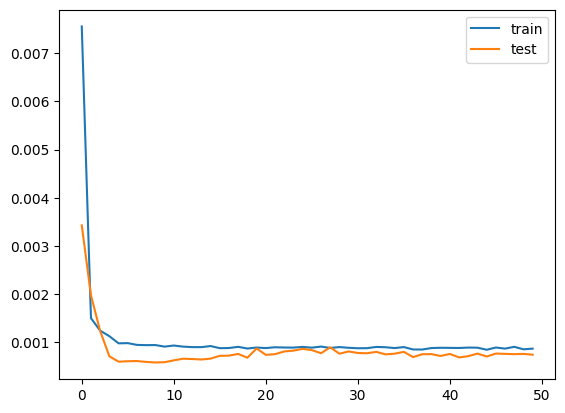

In [149]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Making Prediction/Forecasting**

In [161]:

from numpy import concatenate

# Check the shapes of yhat and test_X before proceeding
print("Shape of yhat (predictions):", yhat.shape)
print("Shape of test_X (flattened):", test_X.shape)

# Flatten test_X to prepare for concatenation
test_X_flattened = test_X.reshape((test_X.shape[0], test_X.shape[2]))
print("Shape of test_X_flattened:", test_X_flattened.shape)

# Concatenate predictions (yhat) with test_X features (excluding the first column)
inv_yhat = concatenate((yhat, test_X_flattened[:, 1:]), axis=1)

# Match the shape of inv_yhat with the scaler's expected input
expected_features = scaler.scale_.shape[0]
current_features = inv_yhat.shape[1]

if current_features < expected_features:
    # Add padding (zeros) to match the expected number of features
    padding = np.zeros((inv_yhat.shape[0], expected_features - current_features))
    inv_yhat_padded = np.hstack((inv_yhat, padding))
else:
    inv_yhat_padded = inv_yhat

print("Shape of inv_yhat_padded (after padding if necessary):", inv_yhat_padded.shape)

# Invert scaling for the forecast (predicted values)
inv_yhat = scaler.inverse_transform(inv_yhat_padded)
inv_yhat = inv_yhat[:, 0]  # Extract the first column (predicted target)
print("Shape of inv_yhat (final predictions):", inv_yhat.shape)

# Prepare test_y for inversion
test_y = test_y.reshape((len(test_y), 1))  # Ensure test_y is 2D for concatenation

# Concatenate test_y with test_X features for actual values
inv_y = concatenate((test_y, test_X_flattened[:, 1:]), axis=1)

# Match the shape of inv_y with the scaler's expected input
current_features = inv_y.shape[1]

if current_features < expected_features:
    # Add padding (zeros) to match the expected number of features
    padding = np.zeros((inv_y.shape[0], expected_features - current_features))
    inv_y_padded = np.hstack((inv_y, padding))
else:
    inv_y_padded = inv_y

print("Shape of inv_y_padded (after padding if necessary):", inv_y_padded.shape)

#Invert scaling for actual values
inv_y = scaler.inverse_transform(inv_y_padded)
inv_y = inv_y[:, 0]  # Extract the first column (actual target)
print("Shape of inv_y (final actual values):", inv_y.shape)

# Output shapes and confirm consistency
print("Final prediction shape (inv_yhat):", inv_yhat.shape)
print("Final actual values shape (inv_y):", inv_y.shape)


Shape of yhat (predictions): (24235, 1)
Shape of test_X (flattened): (24235, 1, 8)
Shape of test_X_flattened: (24235, 8)
Shape of inv_yhat_padded (after padding if necessary): (24235, 9)
Shape of inv_yhat (final predictions): (24235,)
Shape of inv_y_padded (after padding if necessary): (24235, 9)
Shape of inv_y (final actual values): (24235,)
Final prediction shape (inv_yhat): (24235,)
Final actual values shape (inv_y): (24235,)


**Calculating the RMSE and MAE values**

In [162]:
# calculate RMSE and MAE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae = (mean_absolute_error(inv_y, inv_yhat))
print('Test MAE: %.3f' % mae)

Test RMSE: 0.027
Test MAE: 0.017


**Plotting the Graph of Actual vs Predicted**

Actual : [0.11066398 0.11368209 0.11066398 ... 0.01006036 0.01006036 0.00804829]
Predicted: [0.11192465 0.10983442 0.11297095 ... 0.01036508 0.01193493 0.01191827]


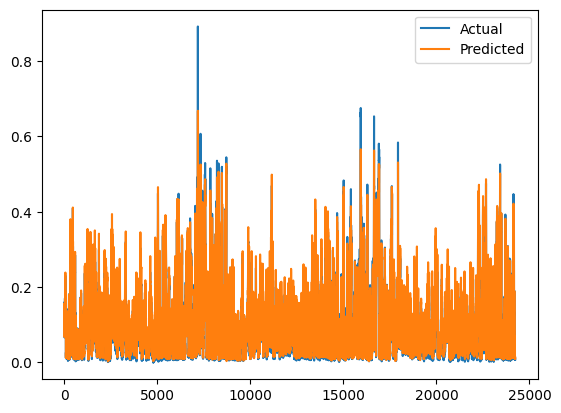

In [163]:
print('Actual :', inv_y)
print('Predicted:', inv_yhat)
# plot history
pyplot.plot(inv_y, label='Actual')
pyplot.plot(inv_yhat, label='Predicted')
pyplot.legend()
pyplot.show()